In [183]:
import pandas as pd #importing all the necessary liibraries to create our model from scratch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
from sklearn.datasets.samples_generator import make_regression

In [213]:
x,y = make_regression(n_samples = 200,n_features = 1,n_informative = 1,noise = 6,bias = 30,random_state = 200)
m = 200 #generating our random dataset using make_regression from sklearn

Text(0, 0.5, 'y-output variable')

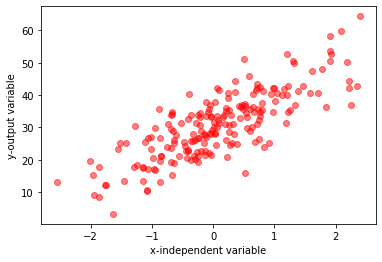

In [214]:
plt.scatter(x,y,color = 'red',alpha = 0.5,marker = 'o') #visualising our data with a scatter plot
plt.xlabel("x-independent variable")
plt.ylabel("y-output variable")

Linear Model

In [215]:
def hypothesis(x,w):
    return(w[1]*np.array(x[:,0])+w[0])

In [216]:
print(x) #x is a matrix

[[-0.05358755]
 [ 0.81490518]
 [ 1.15805552]
 [-0.75361164]
 [ 1.92273803]
 [ 1.22923449]
 [-0.25665373]
 [-0.3916012 ]
 [-0.13390765]
 [ 1.31594368]
 [ 0.75272929]
 [-0.43224009]
 [-0.66643198]
 [ 0.82272281]
 [-1.86451829]
 [-1.52007408]
 [ 0.62675835]
 [ 1.84213516]
 [-1.0844555 ]
 [ 2.18609495]
 [-0.07992433]
 [-0.35957085]
 [-0.27289366]
 [ 2.21796653]
 [ 0.73690722]
 [-0.95172629]
 [ 1.19279792]
 [ 0.19991277]
 [ 0.32154286]
 [-0.22134672]
 [-0.19478459]
 [-0.84640754]
 [-0.01471103]
 [-0.8677184 ]
 [ 0.76579565]
 [-0.11879521]
 [-1.00900322]
 [-0.1968985 ]
 [ 0.59205971]
 [ 0.52423795]
 [ 1.21498404]
 [ 0.52045974]
 [ 0.21215972]
 [ 0.72311791]
 [-0.2327679 ]
 [-0.63968302]
 [-1.95027664]
 [ 0.55642577]
 [-0.41238072]
 [-0.11856477]
 [-0.29594898]
 [ 0.52518578]
 [ 0.49022774]
 [ 0.2630036 ]
 [-1.74434015]
 [-0.21495011]
 [ 0.21348149]
 [ 0.60437586]
 [ 0.2584544 ]
 [ 0.47725678]
 [-0.33175226]
 [-0.33215113]
 [-1.11952533]
 [-0.13055295]
 [-0.14479561]
 [-0.24249065]
 [ 0.02045

In [217]:
print(y) #y is an array

[36.88325346 41.4284682  41.95441238 23.95182201 52.67785917 34.62596852
 22.28124594 40.44804886 22.60461363 49.88591486 26.4956713  20.57517039
 15.2754705  24.04842313 17.7911797  25.10924042 30.00687843 36.29797318
 10.72471891 50.24957873 34.82059046 33.73658725 31.39478645 44.42262545
 35.7006979  29.9457969  31.47380446 31.15710431 31.14713261 33.36514844
 22.85491133 21.27554839 29.13340211 26.73169999 33.63280404 33.59582351
 27.16318389 29.02274523 45.93127317 37.18672727 42.70643559 15.87362965
 35.94069058 42.06646884 26.67989019 25.28033888  9.02171149 33.38033323
 23.00553969 26.98323892 25.99554331 36.72316923 35.62425966 28.66425855
 12.19148457 30.63465681 35.04100296 35.64187416 30.63531011 36.79405459
 27.949774   25.79841788 25.49408577 21.57281939 25.18529652 33.92752488
 31.77907235 19.70219235 20.99454518 23.1733545  23.20928728 47.37613148
 21.16837085 35.33099261 22.62810476 59.85669215 50.53302055 33.27359479
 37.815114   30.09261689 15.15194149 19.60513786 21

Cost Function

In [218]:
def cost(w,x,y):
    return (.5/m) * np.sum(np.square(hypothesis(x,w) - np.array(y))) #this is formula to calculate the cost function

Gradient Descent

In [219]:
def grad(w,x,y):
    g = [0]*2 #an array to store the partial derivatives with respect to w0 and w1
    g[0] = (1/m) * np.sum(hypothesis(x,w) - np.array(y)) #finding the partial  derivatives of w0 w.r.t cost function 
    g[1] = (1/m) * np.sum((hypothesis(x,w) - np.array(y)) * np.array(x[:,0])) #finding partial derivative of w1 w.r.t cost function
    return g

In [228]:
def descent(w_new,w_prev,lr): #here lr is the learning rate 
    print(w_prev)
    print(cost(w_prev,x,y))
    j = 0 #stores the number of iterations
    while True:
        w_prev = w_new #updating the values of w
        w0 = w_prev[0] - lr*grad(w_prev,x,y)[0] #performing the gradient descent on w0
        w1 = w_prev[1] - lr*grad(w_prev,x,y)[1] #performing the gradient descent on w1
        w_new = [w0,w1] #updating values of w0 and w1 in w_new
        print(w_new)
        print(cost(w_new,x,y))
        if(w_new[0] - w_prev[0]) **2 + (w_new[1] - w_prev[1]) **2 <= pow(10,-6): #calculating the square of distances between two points and terminating if it is less than 10 to the power -6
            return w_new
        if j>500: #if the total number of iteration exceeds 500 we terminate the process
            return w_new
        j +=1

Initializing Parameters

In [229]:
w = [0,-1]

Training the model

In [230]:
w = descent(w,w,.1)
print(w)

[0, -1]
540.5360663843456
[3.0956308633447547, 0.11442770988081663]
437.91139336428444
[5.873446610978822, 1.1023454281382854]
355.5039050187037
[8.366165526017987, 1.9778657783247602]
289.3267499184995
[10.603129563187093, 2.753547324958939]
236.1799750745718
[12.610653489037027, 3.440564026385428]
193.49509649539323
[14.412337853388406, 4.048856351454087]
159.2103901995911
[16.0293495446536, 4.587266032213945]
131.6708284668908
[17.480673291820082, 5.063656213710697]
109.54778810165583
[18.7833371265594, 5.485018573380515]
91.77462156224563
[19.952614505935692, 5.857568814053481]
77.49495508304668
[21.002205515744066, 6.186831784078626]
66.02119816099949
[21.944399323224108, 6.4777173436470505]
56.801246289923824
[22.79021982273288, 6.734587976310905]
49.39175789964725
[23.549556216205993, 6.961319037445921]
43.436706577550574
[24.23128008944935, 7.1613524356181975]
38.6501664442448
[24.843350383306017, 7.337744457271138]
34.802494555336104
[25.39290751357782, 7.493208368754656]
31.7

Text(0, 0.5, 'y-output variable')

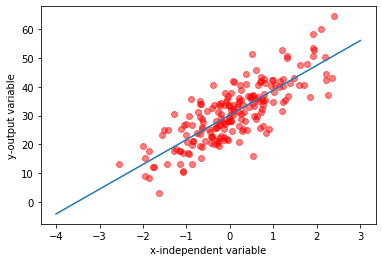

In [231]:
def vis(formula ,x_range):
    x1 = np.array(x_range)
    y = formula(x1)
    plt.plot(x1,y)
    
    
def my_formula(x1):
    return w[0]+w[1]*x1
    
    
plt.scatter(x,y,color = 'red',alpha = 0.5,marker = 'o')
vis(my_formula, range(-4,4))
plt.xlabel("x-independent variable")
plt.ylabel("y-output variable")